<a href="https://colab.research.google.com/github/leman-cap13/my_projects/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

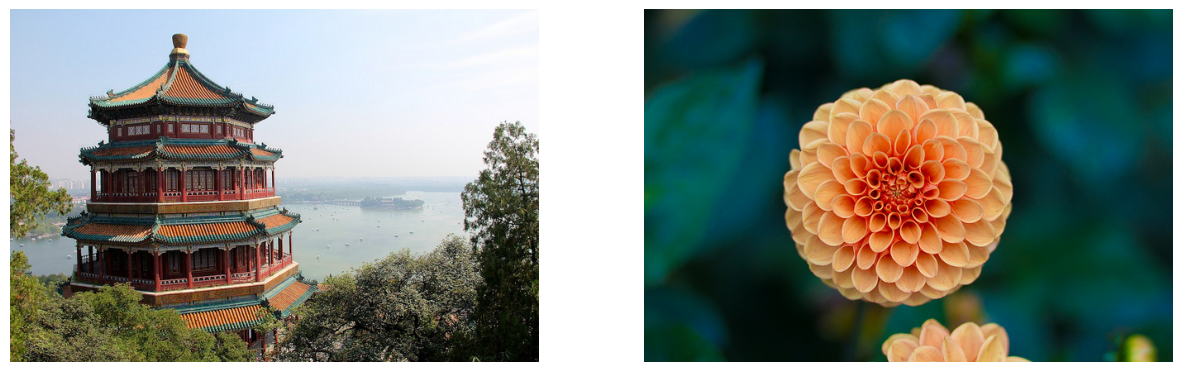

In [ ]:
images=load_sample_images()['images']
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

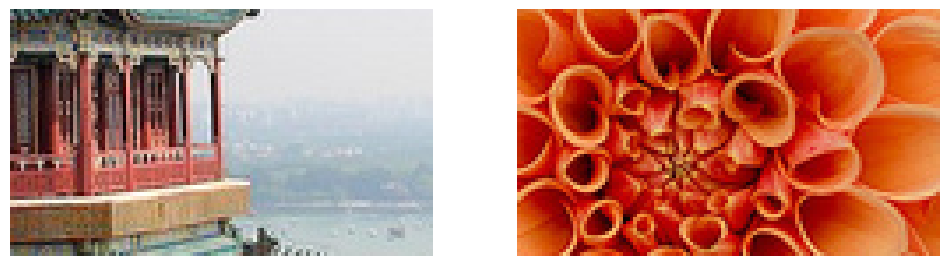

In [ ]:
images=tf.keras.layers.CenterCrop(height=70,width=120)(images)
images=tf.keras.layers.Rescaling(scale=1/255.)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7)
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

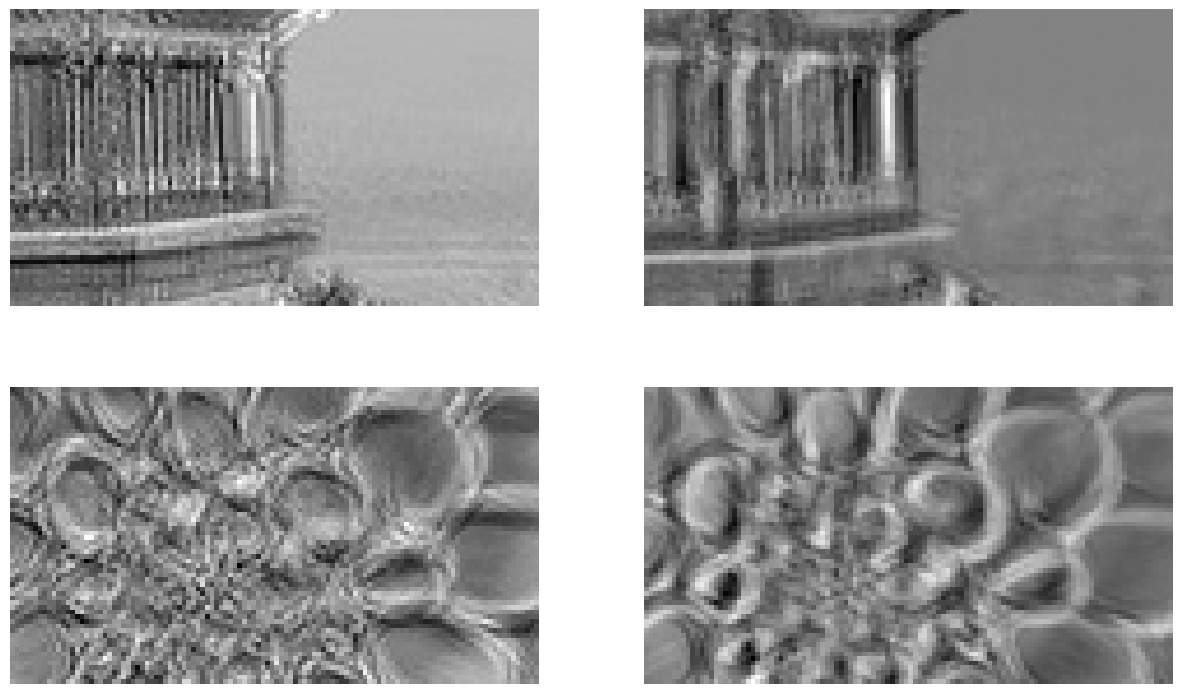

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx*2+fmap_idx+1)
    plt.imshow(fmaps[image_idx,:,:, fmap_idx], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7, padding='valid')

fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7, padding='same')

fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same', strides=2)

fmaps=conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

hem en hem hundurluk 2 defe azalacaq cunku strides=2


In [ ]:
tf.random.set_seed(42)
filters=tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images,filters,strides=1,padding='SAME')+biases


low level nn

#MAX POOLING

In [ ]:
max_pool=tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output=max_pool(images)

In [ ]:
global_avg_pool=tf.keras.layers.GlobalAvgPool2D()

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
global_avg_pool=tf.keras.layers.Lambda(lambda x : tf.reduce_mean(x,axis=[1,2]))

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

In [ ]:
images[0].shape,global_avg_pool(images)[0].shape

(TensorShape([70, 120, 3]), TensorShape([3]))

In [ ]:
import numpy as np
mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=mnist
X_train_full=np.expand_dims(X_train_full,axis=-1).astype(np.float32)/255
X_test=np.expand_dims(X_test.astype(np.float32),axis=-1)/255
X_train,X_valid=X_train_full[:-5000], X_train_full[-5000:]
y_train,y_valid=y_train_full[:-5000],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=7,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,padding='same', kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128,padding='same', kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256,padding='same', kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256,padding='same', kernel_size=3, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=tf.keras.optimizers.SDG(learning_rate=1e-3, momentum=0.9,nesterov=True),
#               metrics=['accuracy'])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
score=model.evaluate(X_test,y_test)
X_new=X_test[:10]
y_pred=model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.6223 - loss: 1.0797 - val_accuracy: 0.8722 - val_loss: 0.3610
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.8524 - loss: 0.4347 - val_accuracy: 0.8804 - val_loss: 0.3254
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8804 - loss: 0.3589 - val_accuracy: 0.8992 - val_loss: 0.2813
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8946 - loss: 0.3090 - val_accuracy: 0.9008 - val_loss: 0.2820
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9036 - loss: 0.2863 - val_accuracy: 0.9062 - val_loss: 0.2654
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9094 - loss: 0.2650 - val_accuracy: 0.9048 - val_loss: 0.2779
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9152 - loss: 0.2490 - val_accuracy: 0.9064 - val_loss: 0.2898
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9192 - loss: 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,505 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,671 (10.79 MB)

# implementing a RESNET-34 CNN

In [ ]:
from functools import partial

DeFaultConv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,strides=1,padding='same',kernel_initializer='he_normal', use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.activation=tf.keras.activations.get(activation)
    self.main_layer=[
        DeFaultConv2D(filters,strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DeFaultConv2D(filters),
        tf.keras.layers.BatchNormalization()

    ]

    self.skip_layers=[]
    if strides >1:
      self.skip_layers=[
          DeFaultConv2D(filters,kernel_size=1,strides=strides),
          tf.keras.layers.BatchNormalization()
      ]
  def call(self,inputs):
    Z=inputs
    for layer in self.main_layer:
      Z=layer(Z)
    skip_Z=inputs
    for layer in self.skip_layers:
      skip_Z=layer(skip_Z)
    return self.activation(Z+skip_Z)




In [ ]:
from functools import partial
Conv2D=partial(
    tf.keras.layers.Conv2D,
    kernel_size=3,
    filters=64,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'

)

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    Conv2D(kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=128),
    Conv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    Conv2D(filters=256),
    Conv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')

])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.6240 - loss: 1.0567 - val_accuracy: 0.8574 - val_loss: 0.3780
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8517 - loss: 0.4366 - val_accuracy: 0.8896 - val_loss: 0.3131
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8795 - loss: 0.3633 - val_accuracy: 0.8940 - val_loss: 0.3087
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8937 - loss: 0.3220 - val_accuracy: 0.8986 - val_loss: 0.2833
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9040 - loss: 0.2872 - val_accuracy: 0.9054 - val_loss: 0.2652
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9079 - loss: 0.2666 - val_accuracy: 0.8968 - val_loss: 0.2815
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9138 - loss: 0.2502 - val_accuracy: 0.9042 - val_loss: 0.2977
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9171 - loss: 

In [ ]:
conv2d=partial(tf.keras.layers.Conv2D,kernel_size=3,activation='relu',kernel_initializer='he_normal',padding='same')
conv2d_stride=partial(tf.keras.layers.Conv2D,activation='relu',kernel_initializer='he_normal',padding='same',strides=2)


In [ ]:
tf.keras.backend.clear_session()
inputs=tf.keras.layers.Input(shape=(224,224,3))
conv1=conv2d_stride(64,7)(inputs)
max_pool=tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(conv1)
conv2_0=conv2d(64)(max_pool)
conv2_1=conv2d(64)(conv2_0)
add_0=tf.keras.layers.Add()([max_pool,conv2_1])
conv2_2=conv2d(64)(add_0)
conv2_3=conv2d(64)(conv2_2)
add_1=tf.keras.layers.Add()([add_0,conv2_3])
conv2_4=conv2d(64)(add_1)
conv2_5=conv2d(64)(conv2_4)
add_2=tf.keras.layers.Add()([add_1,conv2_5])
conv3_0=conv2d(128)(add_2)
conv3_1=conv2d(128)(conv3_0)
add_3=tf.keras.layers.Concatenate(axis=-1)([add_2,conv3_1])
conv3_2=conv2d(128)(add_3)
conv3_3=conv2d(128)(conv3_2)
add_4=tf.keras.layers.Concatenate(axis=-1)([add_3,conv3_3])

conv3_4=conv2d(128)(add_4)
conv3_5=conv2d(128)(conv3_4)
add_5=tf.keras.layers.Concatenate(axis=-1)([add_4,conv3_5])

conv3_6=conv2d(128)(add_5)
conv3_7=conv2d(128)(conv3_6)
add_6=tf.keras.layers.Concatenate(axis=-1)([add_5,conv3_7])


conv4_0=conv2d(256)(add_6)
conv4_1=conv2d(256)(conv4_0)
add_7=tf.keras.layers.Concatenate(axis=-1)([add_6,conv4_1])

conv4_2=conv2d(256)(add_7)
conv4_3=conv2d(256)(conv4_2)
add_8=tf.keras.layers.Concatenate(axis=-1)([add_7,conv4_3])

conv4_4=conv2d(256)(add_8)
conv4_5=conv2d(256)(conv4_4)
add_9=tf.keras.layers.Concatenate(axis=-1)([add_8,conv4_5])

conv4_6=conv2d(256)(add_9)
conv4_7=conv2d(256)(conv4_6)
add_10=tf.keras.layers.Concatenate(axis=-1)([add_9,conv4_7])

conv4_8=conv2d(256)(add_10)
conv4_9=conv2d(256)(conv4_8)
add_11=tf.keras.layers.Concatenate(axis=-1)([add_10,conv4_9])


conv4_10=conv2d(256)(add_11)
conv4_11=conv2d(256)(conv4_10)
add_12=tf.keras.layers.Concatenate(axis=-1)([add_11,conv4_11])


conv5_0=conv2d(512)(add_12)
conv5_1=conv2d(512)(conv5_0)
add_13=tf.keras.layers.Concatenate(axis=-1)([add_12,conv5_1])


conv5_2=conv2d(512)(add_13)
conv5_3=conv2d(512)(conv5_2)
add_14=tf.keras.layers.Concatenate(axis=-1)([add_13,conv5_3])

conv5_4=conv2d(512)(add_14)
conv5_5=conv2d(512)(conv5_4)
add_15=tf.keras.layers.Concatenate(axis=-1)([add_14,conv5_5])


avg_pool=tf.keras.layers.GlobalAveragePooling2D()(add_15)
outputs=tf.keras.layers.Dense(10,activation='softmax')(avg_pool)

resnet__34=tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
add_15.shape

(None, 56, 56, 3648)

In [ ]:
tf.keras.backend.clear_session()
inputs=tf.keras.layers.Input(shape=(224,224,3))
conv1=conv2d_stride(64,7)(inputs)
max_pool=tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(conv1)
conv2_0=conv2d(64)(max_pool)
conv2_1=conv2d(64)(conv2_0)
add_0=tf.keras.layers.Add()([max_pool,conv2_1])

conv2_2=conv2d(64)(add_0)
conv2_3=conv2d(64)(conv2_2)
add_1=tf.keras.layers.Add()([add_0,conv2_3])

conv2_4=conv2d(64)(add_1)
conv2_5=conv2d(64)(conv2_4)
add_2=tf.keras.layers.Add()([add_1,conv2_5])

add_2_upscaled=tf.keras.layers.Conv2D(128,kernel_size=(1,1))(add_2)
conv3_0=conv2d(128)(add_2)
conv3_1=conv2d(128)(conv3_0)
add_3=tf.keras.layers.Add()([add_2_upscaled,conv3_1])


conv3_2=conv2d(128)(add_3)
conv3_3=conv2d(128)(conv3_2)
add_4=tf.keras.layers.Add()([add_3,conv3_3])


conv3_4=conv2d(128)(add_4)
conv3_5=conv2d(128)(conv3_4)
add_5=tf.keras.layers.Add()([add_4,conv3_5])


conv3_6=conv2d(128)(add_5)
conv3_7=conv2d(128)(conv3_6)
add_6=tf.keras.layers.Add()([add_5,conv3_7])

add_6_upscaled=tf.keras.layers.Conv2D(256,kernel_size=(1,1))(add_6)
conv4_0=conv2d(256)(add_6)
conv4_1=conv2d(256)(conv4_0)
add_7=tf.keras.layers.Add()([add_6_upscaled,conv4_1])


conv4_2=conv2d(256)(add_7)
conv4_3=conv2d(256)(conv4_2)
add_8=tf.keras.layers.Add()([add_7,conv4_3])

conv4_4=conv2d(256)(add_8)
conv4_5=conv2d(256)(conv4_0)
add_9=tf.keras.layers.Add()([add_8,conv4_5])

conv4_6=conv2d(256)(add_9)
conv4_7=conv2d(256)(conv4_6)
add_10=tf.keras.layers.Add()([add_9,conv4_7])

conv4_8=conv2d(256)(add_10)
conv4_9=conv2d(256)(conv4_8)
add_11=tf.keras.layers.Add()([add_10,conv4_9])

conv4_10=conv2d(256)(add_11)
conv4_11=conv2d(256)(conv4_10)
add_12=tf.keras.layers.Add()([add_11,conv4_11])

add_12_upscaled=tf.keras.layers.Conv2D(512,kernel_size=(1,1))(add_12)
conv5_0=conv2d(512)(add_12)
conv5_1=conv2d(512)(conv5_0)
add_13=tf.keras.layers.Add()([add_12_upscaled,conv5_1])

conv5_2=conv2d(512)(add_13)
conv5_3=conv2d(512)(conv5_2)
add_14=tf.keras.layers.Add()([add_13,conv5_3])

conv5_4=conv2d(512)(add_14)
conv5_5=conv2d(512)(conv5_4)
add_15=tf.keras.layers.Add()([add_14,conv5_5])

In [ ]:
avg_pool=tf.keras.layers.GlobalAveragePooling2D()(add_15)
outputs=tf.keras.layers.Dense(10,activation='softmax')(avg_pool)

resnet__34=tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    DeFaultConv2D(64,kernel_size=7,strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3,strides=2,padding='same'),


])

prev_filters=64
for filters in [64]*3 +[128]*4 +[256]*6+[512]*3:
  strides=1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters,strides=strides))
  prev_filters=filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
images=load_sample_images()['images']
images_stacked=tf.stack(images,axis=0)
images_resized=tf.keras.layers.Resizing(height=224,width=224,crop_to_aspect_ratio=True)(images_stacked)

In [ ]:
inputs=tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
inputs=tf.cast(inputs,tf.float32)

In [ ]:
Y_proba=model.predict(inputs)
Y_proba.shape

In [ ]:
top_K=tf.keras.applications.resnet50.decode_predictions(Y_proba,top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id , name, y_proba in top_K[image_index]:
    print(f"{class_id}-{name:12s} {y_proba:.2%}")

#PRETRAINED MODELS FOR TRANSFOER LEARNING

In [ ]:
import tensorflow_datasets as tfds
dataset,info=tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size=info.splits["train"].num_examples
class_names=info.features["label"].names
n_classes=info.features["label"].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.AOJNO9_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
test_set_raw, valid_set_raw,train_set_raw=tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

In [ ]:
dataset_size

3670

In [ ]:
class_names


['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes

5

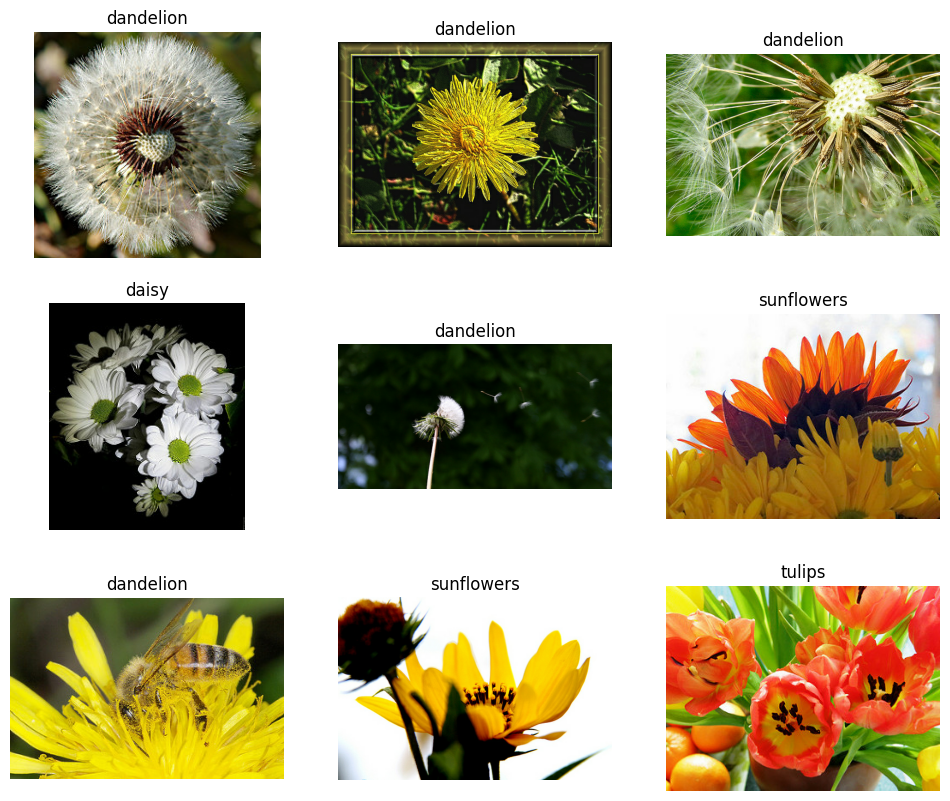

In [ ]:
import matplotlib.pyplot as plt
index=0
plt.figure(figsize=(12,10))
for image, label in train_set_raw.take(9):
  index+=1
  plt.subplot(3,3, index)
  plt.imshow(image)
  plt.title(class_names[label])
  plt.axis('off')

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

batch_size=32
preprocess=tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224,width=224,crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set=train_set_raw.map(lambda X,y:(preprocess(X),y))
train_set=train_set.shuffle(1000,seed=42).batch(batch_size).prefetch(1)
valid_set=valid_set_raw.map(lambda X,y:(preprocess(X), y )).batch(batch_size)
test_set=test_set_raw.map(lambda X,y :(preprocess(X), y)).batch(batch_size)

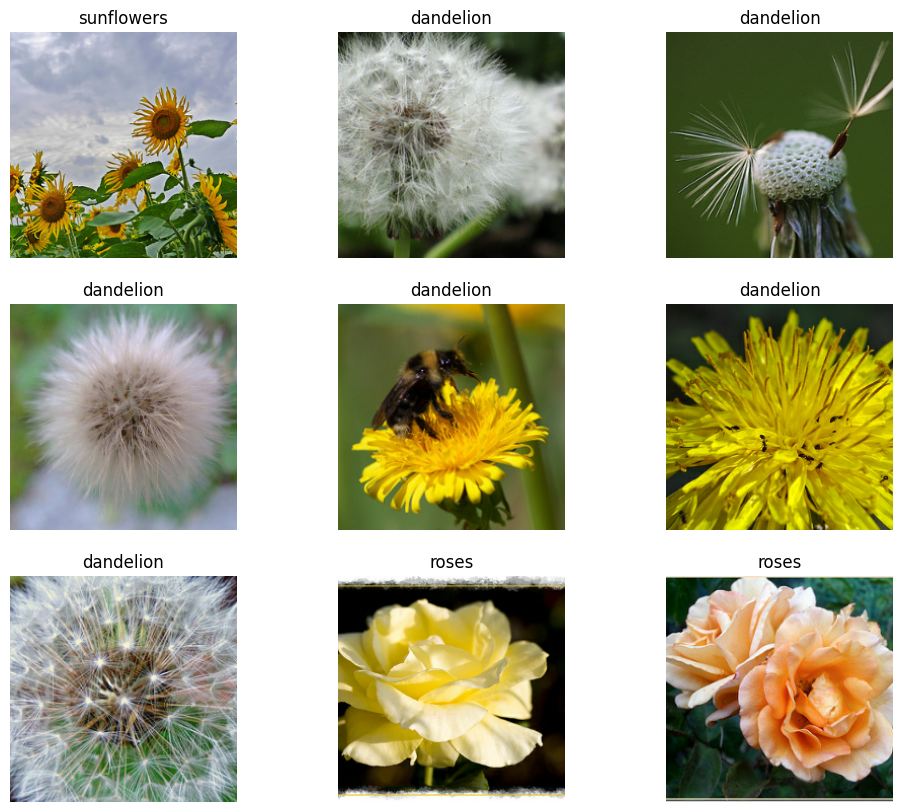

In [ ]:
plt.figure(figsize=(12,10))
for image_batch,label_batch in train_set.take(1):
  for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow((image_batch[index]+1)/2)
    plt.title(class_names[label_batch[index]])
    plt.axis('off')


In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal',seed=42),
    tf.keras.layers.RandomRotation(factor=0.05,seed=42)
    # tf.keras.layers.RndomContrast(factor=0.2,seed=42)
])

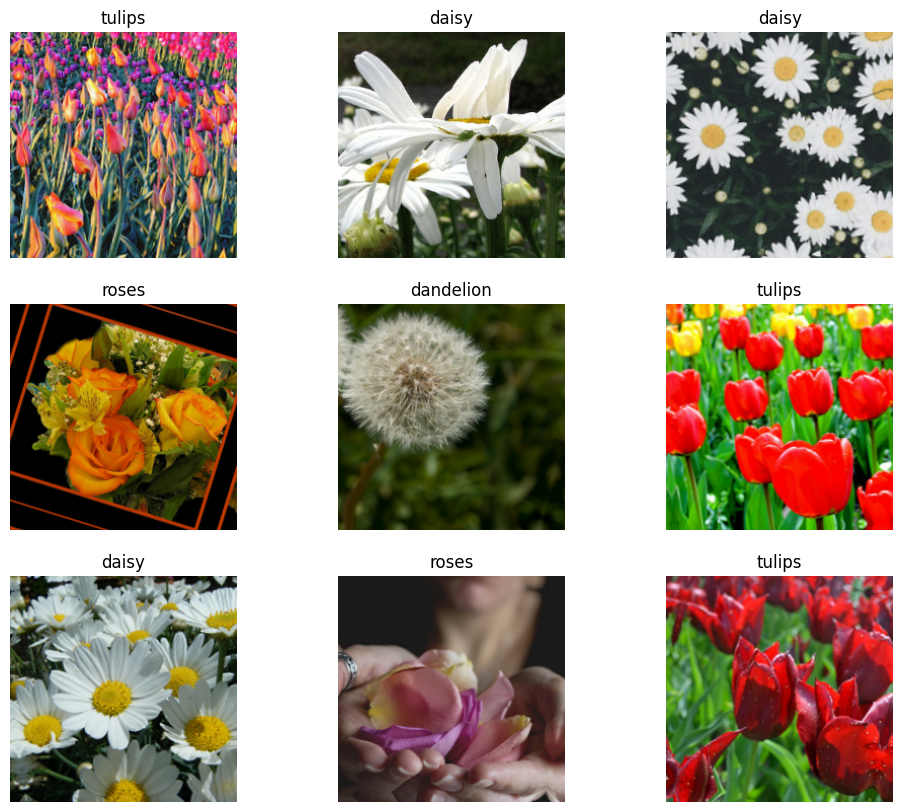

In [ ]:
import numpy as np

plt.figure(figsize=(12,10))
for X_batch, y_batch in train_set.take(1):
  X_batch_augmented=data_augmentation(X_batch)
  for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow(X_batch_augmented[index]/2+0.5)
    plt.axis('off')
    plt.title(class_names[y_batch[index]])

In [ ]:
tf.random.set_seed(42)
base_model=tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(n_classes,activation='softmax')(avg)
model=tf.keras.Model(inputs=base_model.input,outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
optimizers=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers,
              metrics=['accuracy'])

history=model.fit(train_set,validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.7281 - loss: 0.7955 - val_accuracy: 0.7931 - val_loss: 0.7518
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.8873 - loss: 0.4616 - val_accuracy: 0.8494 - val_loss: 0.6835
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.9276 - loss: 0.2333 - val_accuracy: 0.8475 - val_loss: 0.6621


In [ ]:
for layer in base_model.layers:
  print(layer.name)

In [ ]:
for layer in base_model.layers[56:]:
  layer.trainable=True

optimizers=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers,
              metrics=['accuracy'])

history=model.fit(train_set,validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 50s 362ms/step - accuracy: 0.7478 - loss: 0.7705 - val_accuracy: 0.4501 - val_loss: 17.5187
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.9059 - loss: 0.3074 - val_accuracy: 0.8276 - val_loss: 0.8030
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9461 - loss: 0.1684 - val_accuracy: 0.7441 - val_loss: 2.3483
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - accuracy: 0.9751 - loss: 0.0813 - val_accuracy: 0.8784 - val_loss: 0.4221
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - accuracy: 0.9616 - loss: 0.1050 - val_accuracy: 0.9056 - val_loss: 0.3258
Epoch 6/10
20/86 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.9769 - loss: 0.0660

KeyboardInterrupt: 